In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/charl/Downloads/dataset.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [54]:
'''
age - 나이
sex - (1=남성, 0=여성)
cp - 가슴 통증 유형(0,1,2,3,4)
trestbps - 안정 혈압
chol - 혈청 코레스테롤
fbs - 공복 혈당(1=true, 2-false)
restecg - 안정 심전도 결과 (0,1,2)
thalach - 최대 심박동수
exang - 협심증 유발 운동(1=yesl 0=no)
oldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression
slope - 최대 운동 ST segment의 기울기
ca - 형광 투시된 주요 혈관의 수(0,1,2,3)
thal - (3=보통; 6=해결된 결함; 7=해결가능한 결함)
target - 심장병 진단 (1=ture; 0=false)
'''

'\nage - 나이\nsex - (1=남성, 0=여성)\ncp - 가슴 통증 유형(0,1,2,3,4)\ntrestbps - 안정 혈압\nchol - 혈청 코레스테롤\nfbs - 공복 혈당(1=true, 2-false)\nrestecg - 안정 심전도 결과 (0,1,2)\nthalach - 최대 심박동수\nexang - 협심증 유발 운동(1=yesl 0=no)\noldpeak - 비교적 안정되기까지 운동으로 유발되는 ST depression\nslope - 최대 운동 ST segment의 기울기\nca - 형광 투시된 주요 혈관의 수(0,1,2,3)\nthal - (3=보통; 6=해결된 결함; 7=해결가능한 결함)\ntarget - 심장병 진단 (1=ture; 0=false)\n'

In [36]:
data.shape

(303, 14)

In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

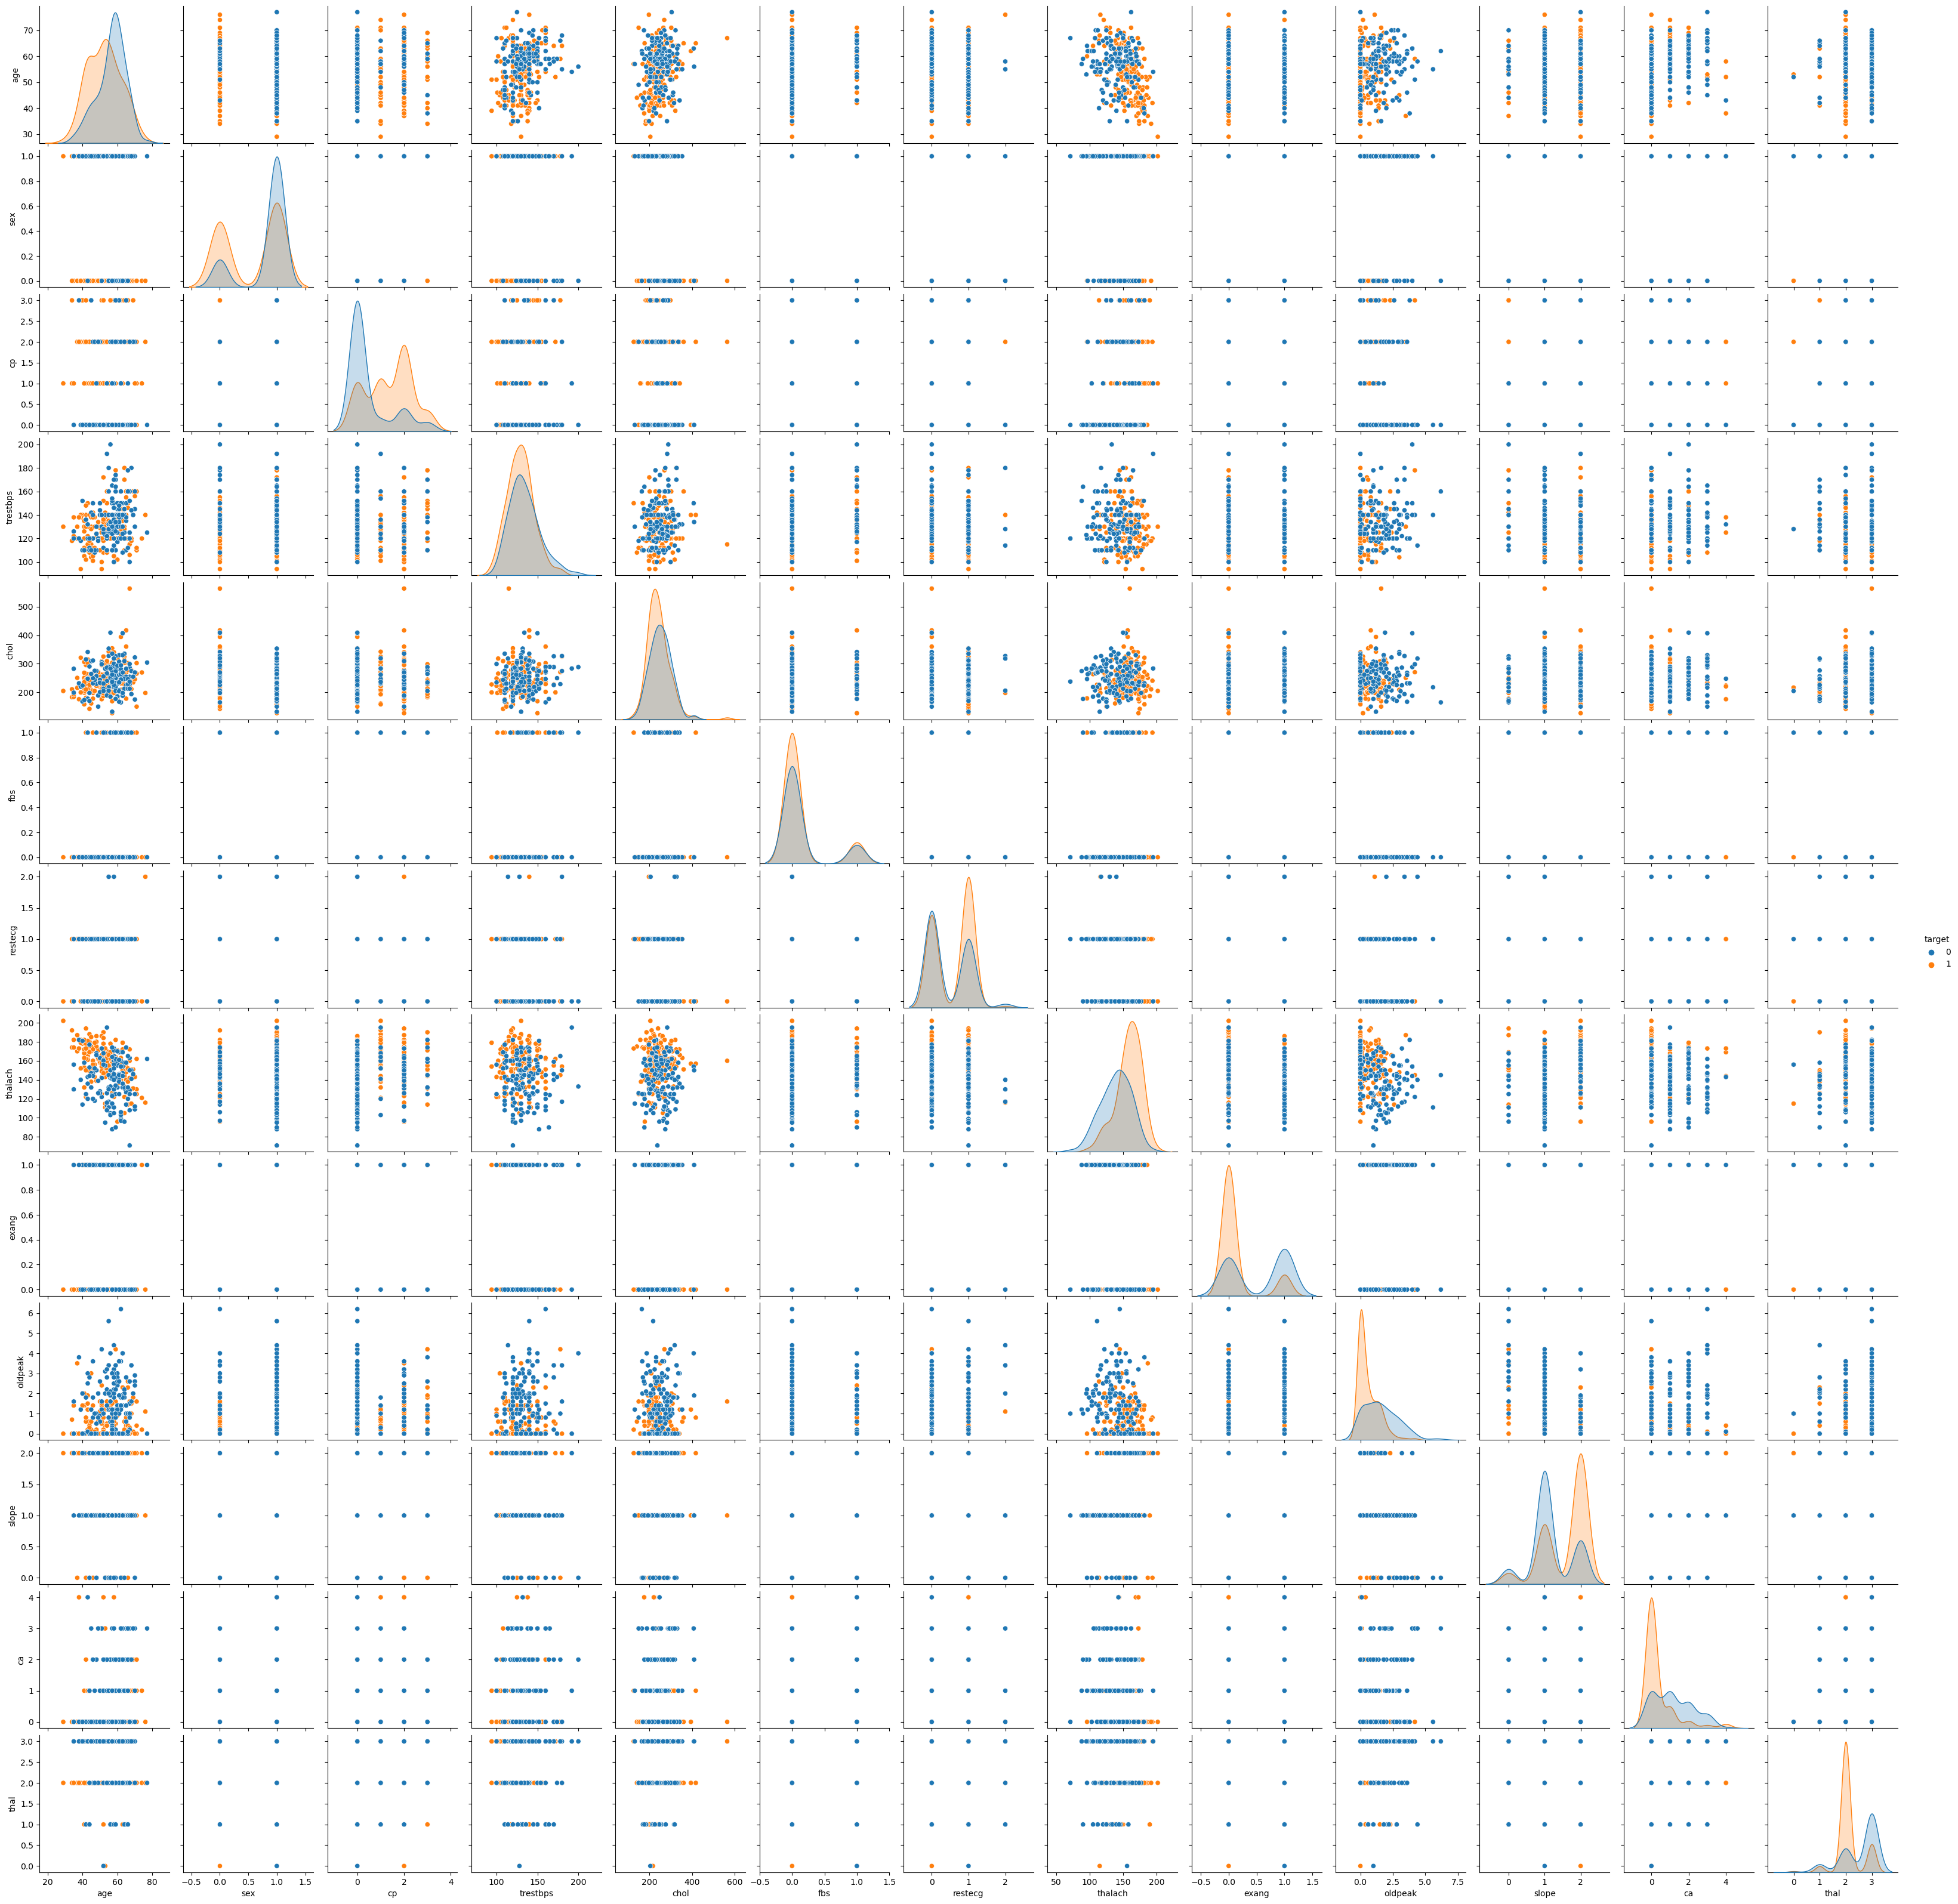

In [5]:
import seaborn as sns

sns.pairplot(data,
             vars=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
            hue ='target')
plt.show()

<Figure size 1000x1000 with 0 Axes>

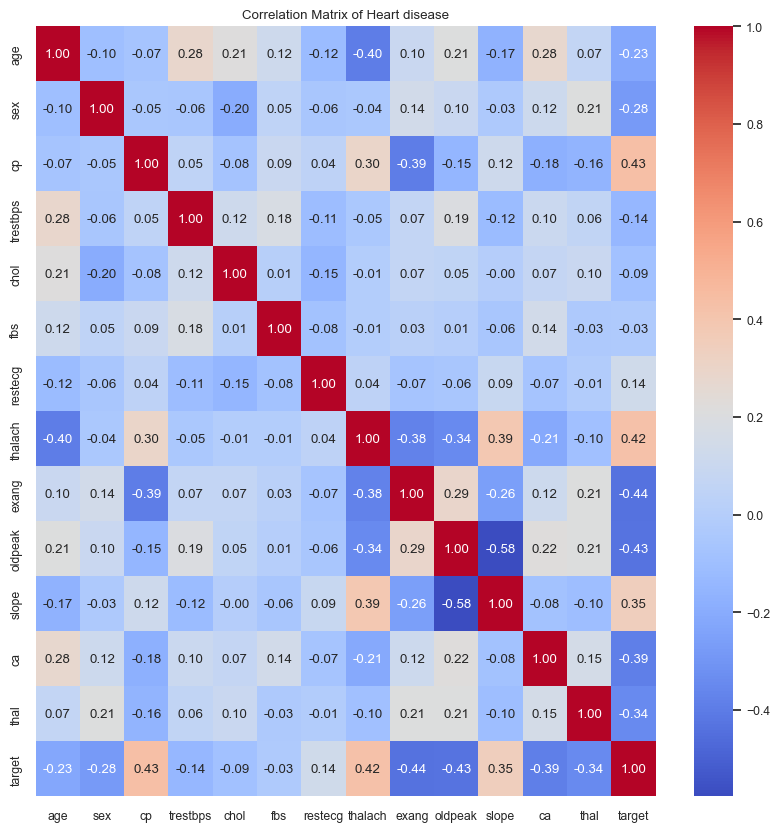

In [46]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Heart disease')
plt.show()

In [47]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

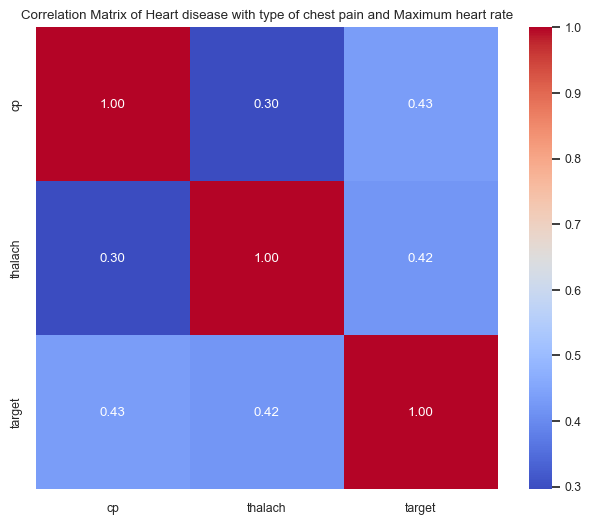

In [52]:
'''
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cmap='coolwarm', fmt='.2f')
#sns.heatmap(data_corr, annot=True, cbar=False)
plt.title('Correlation Matrix of Heart disease')
plt.show()
'''

# Heatmap for the correlation between terrorist attacks and deaths
correlation_matrix = data[['cp', 'thalach', 'target']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Heart disease with type of chest pain and Maximum heart rate')
plt.show()

In [7]:
!pip install sweetviz

                                             |          | [  0%]   00:00 -> (? left)


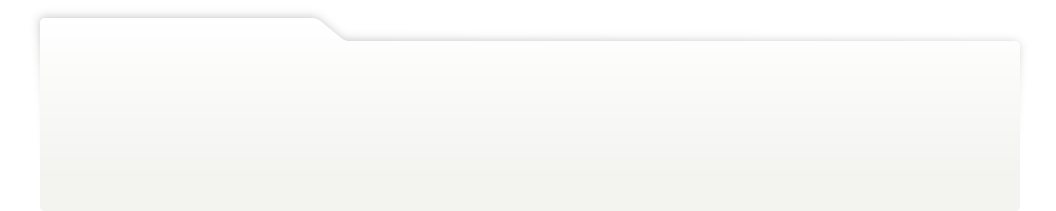
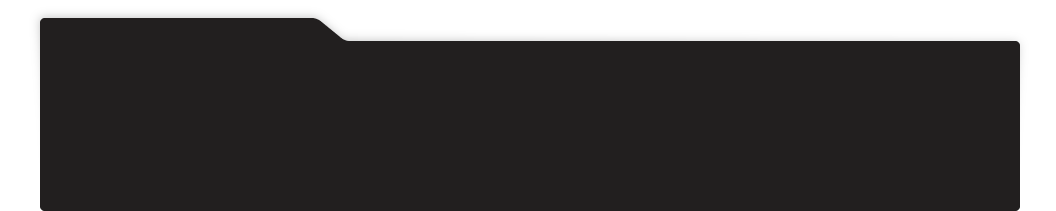
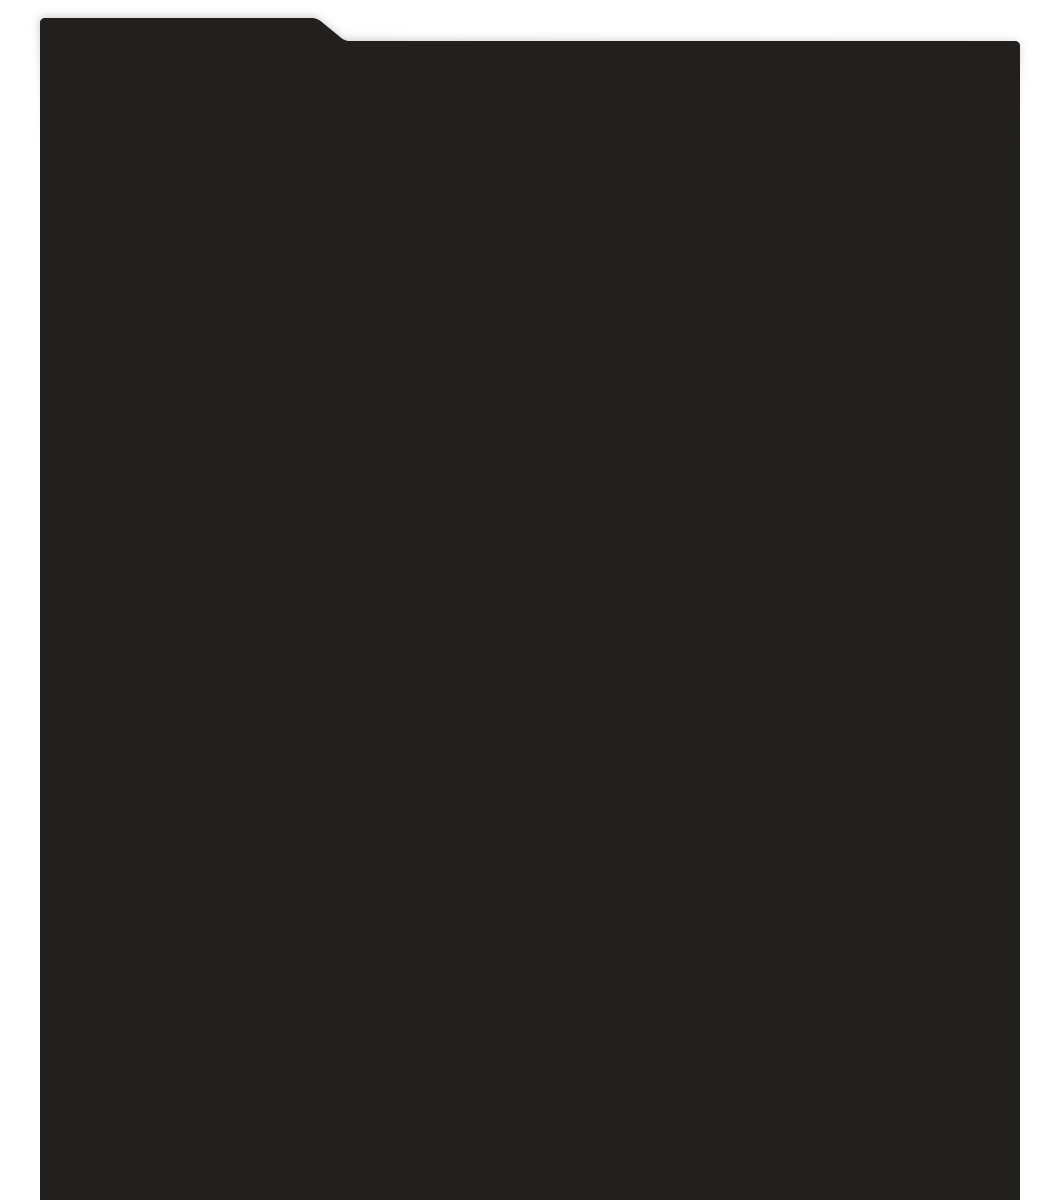
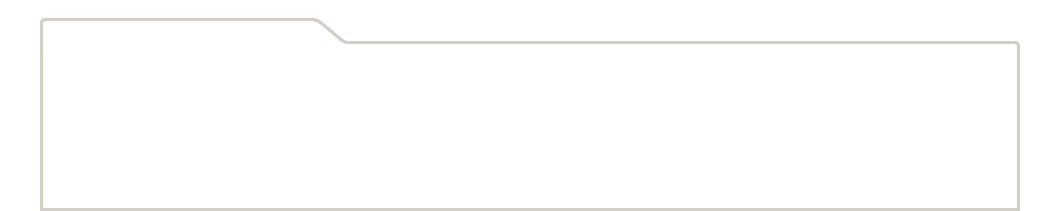
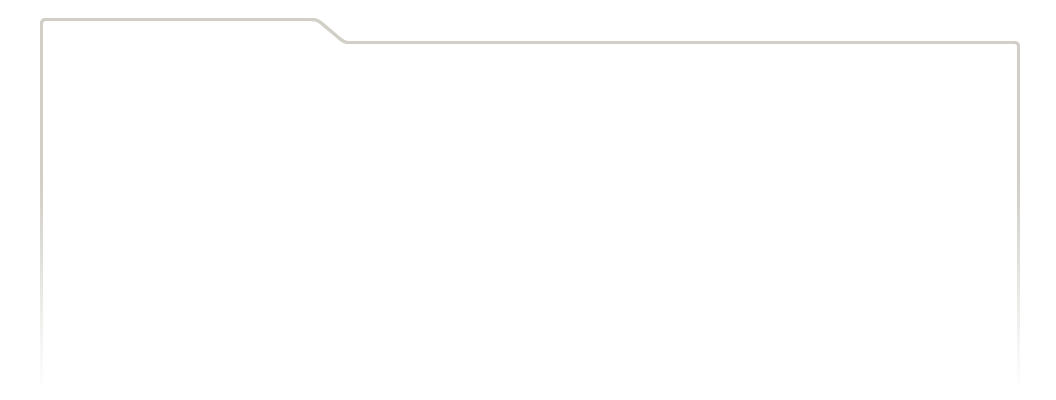
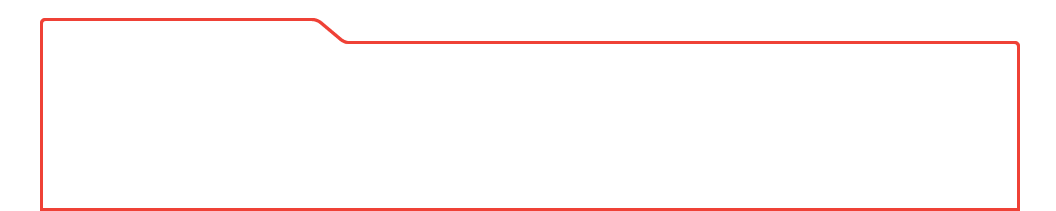
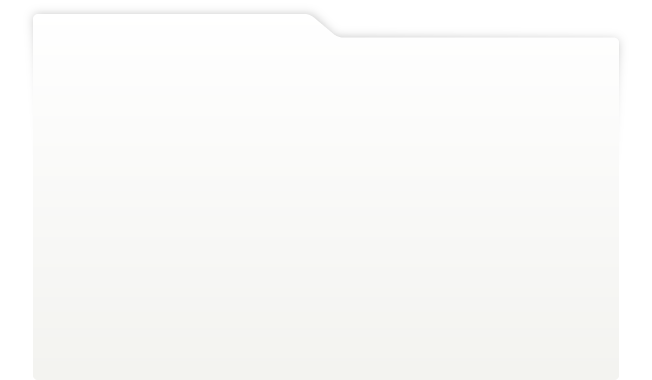
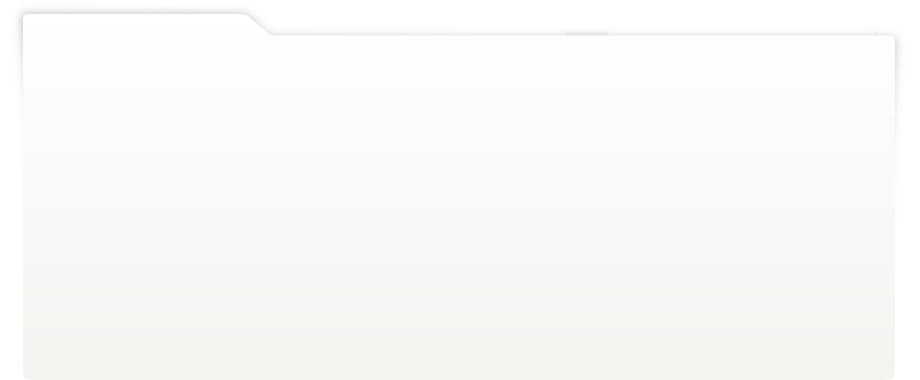
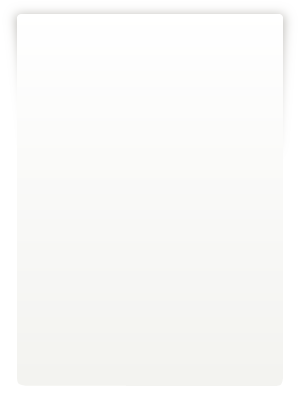
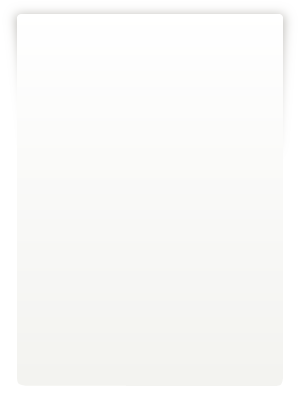
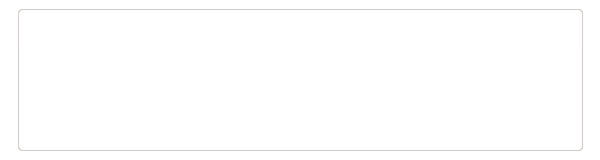
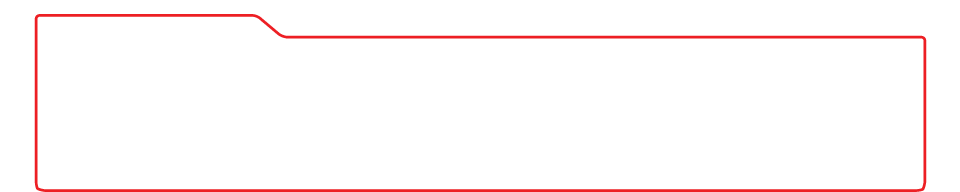
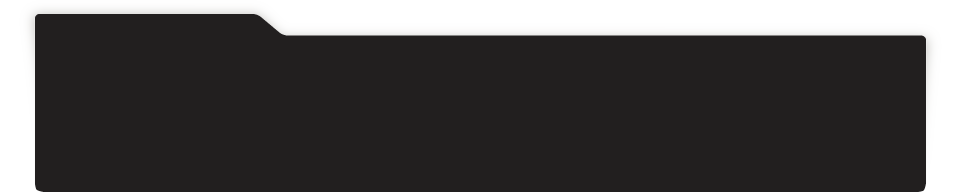
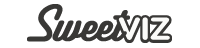
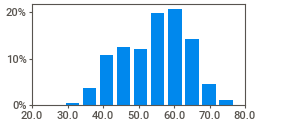
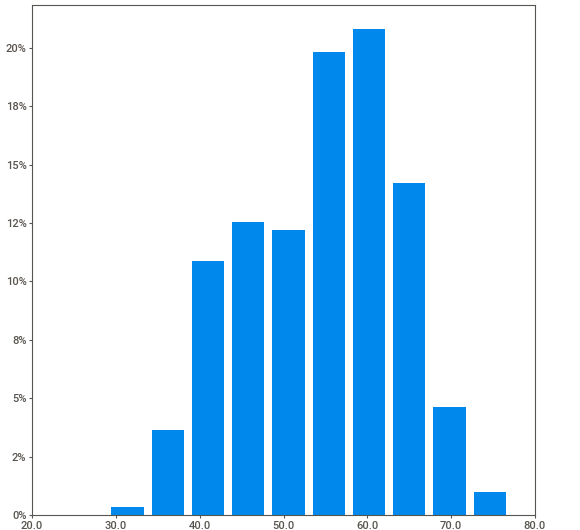
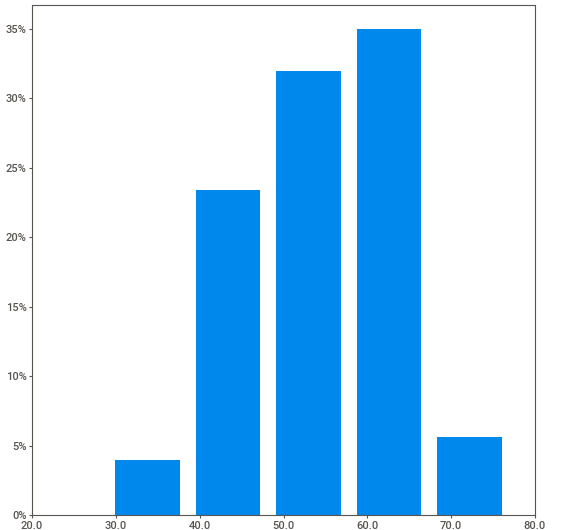
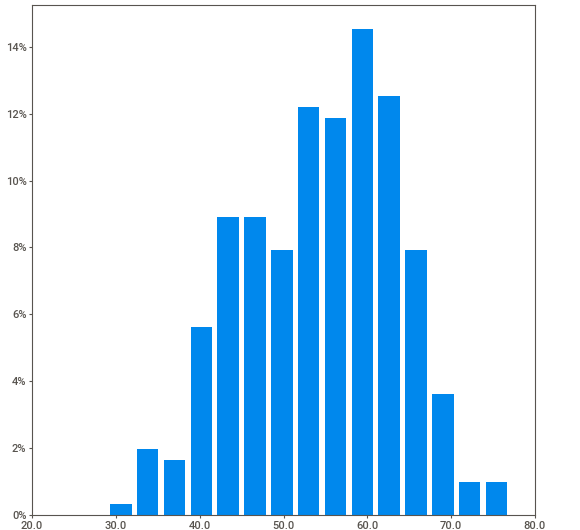
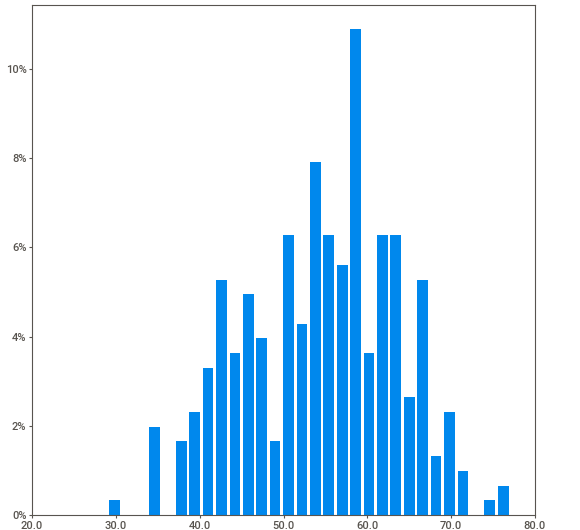
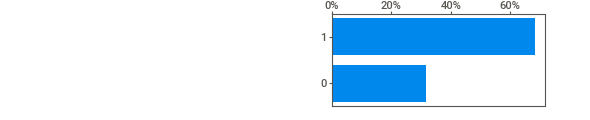
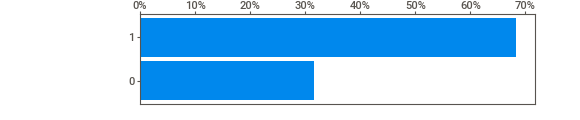
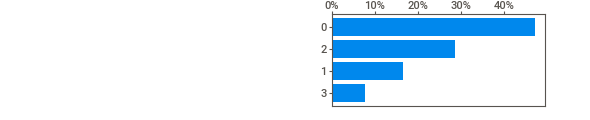
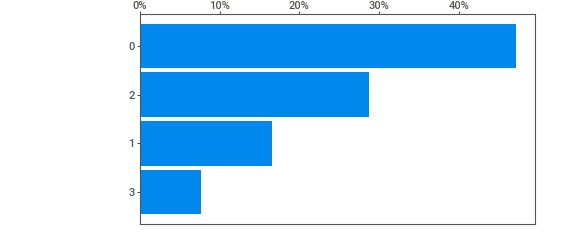
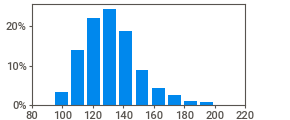
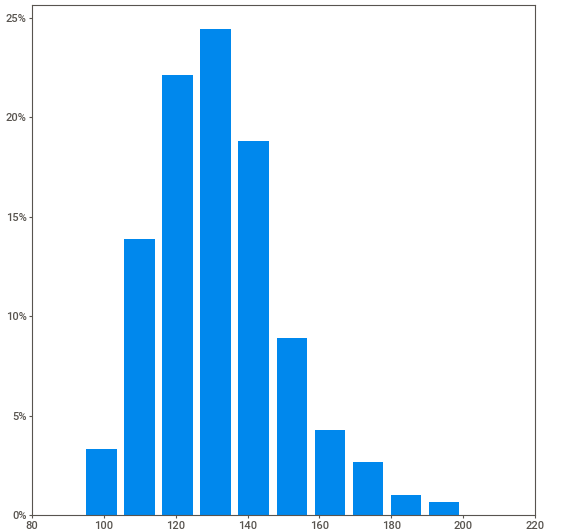
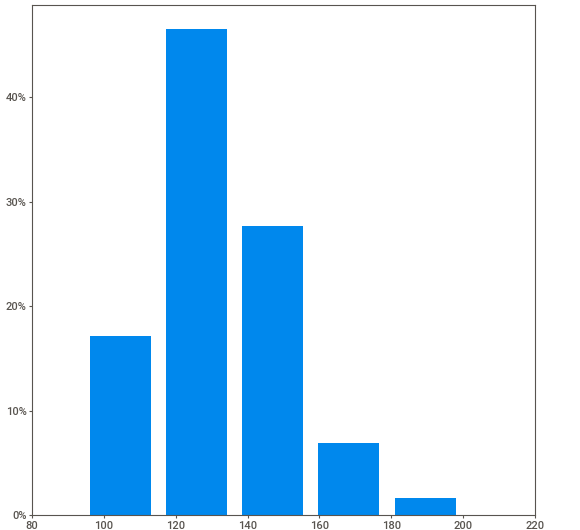
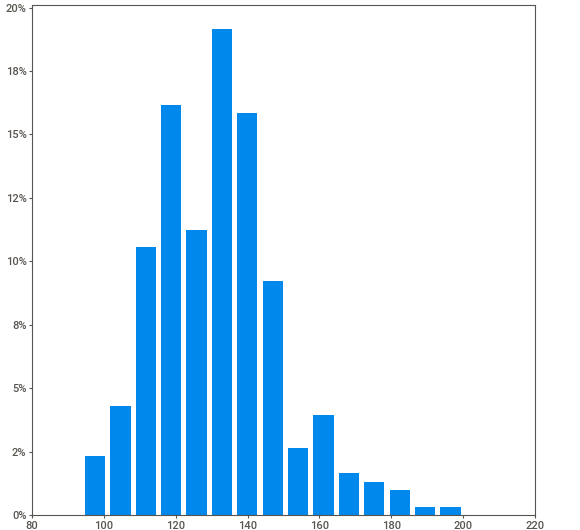
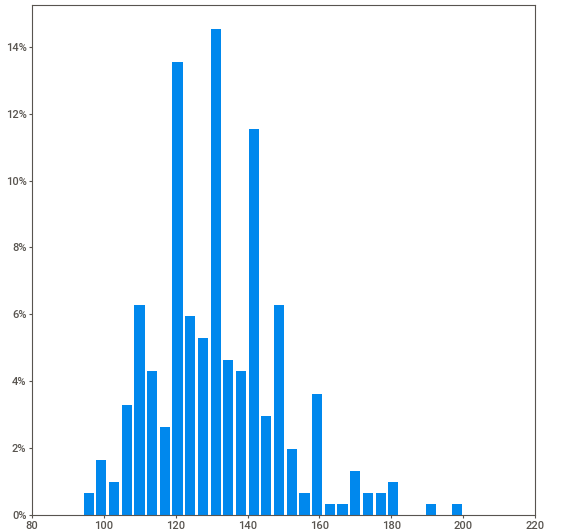
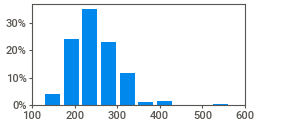
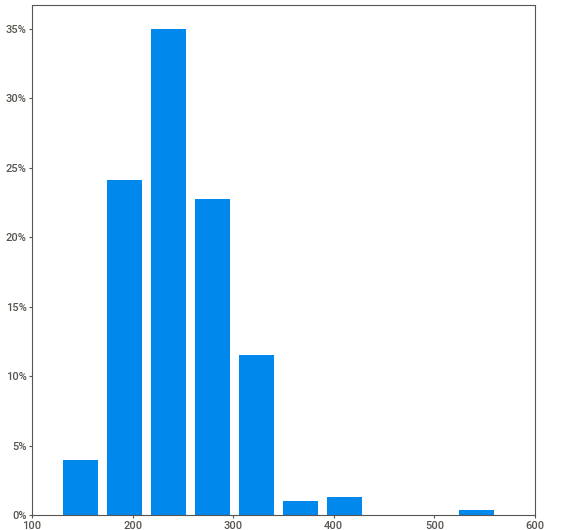
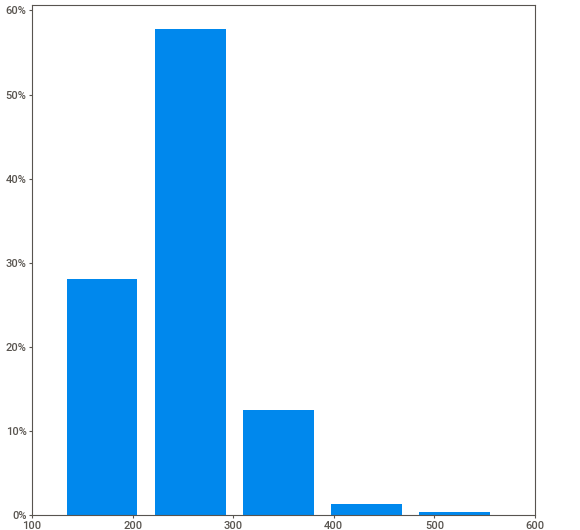
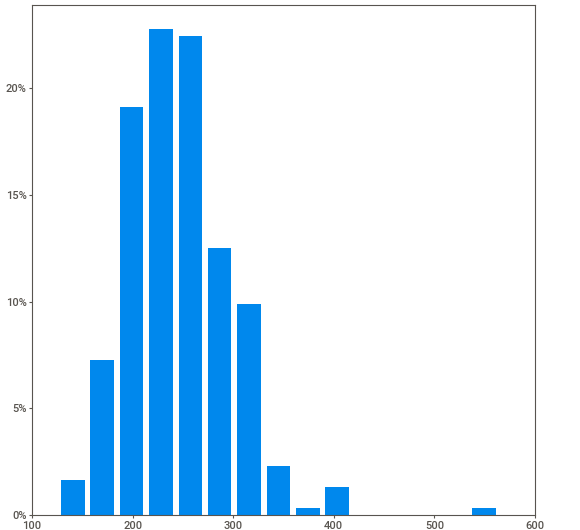
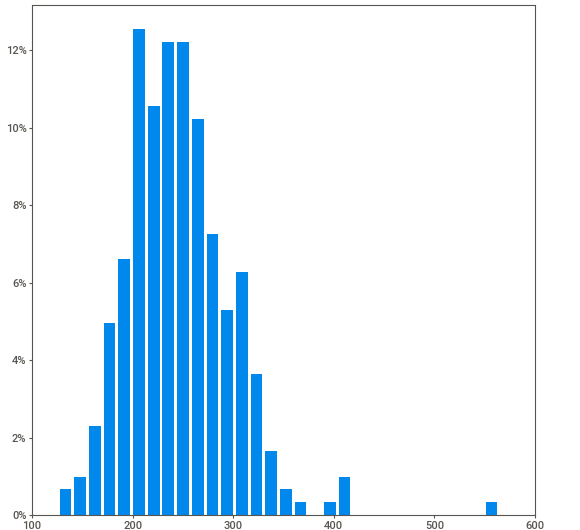
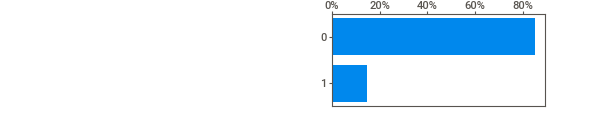
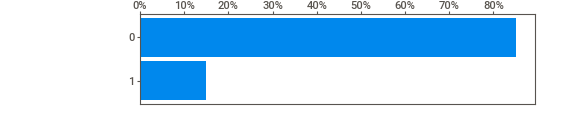
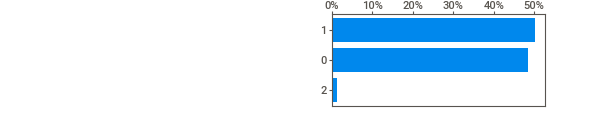
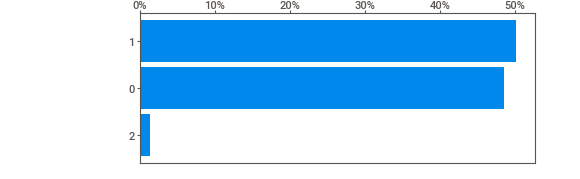
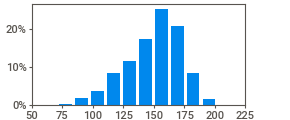
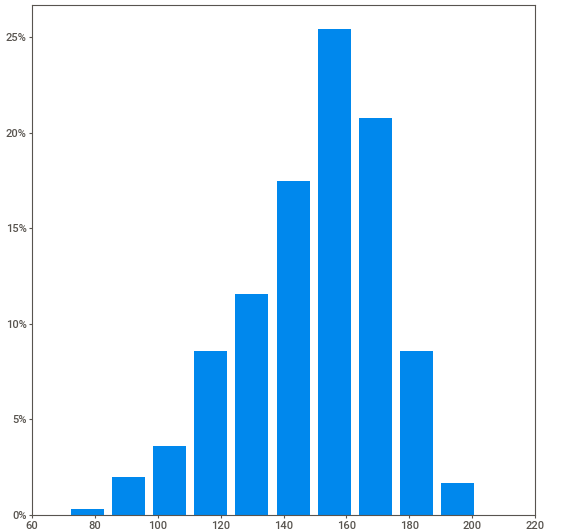
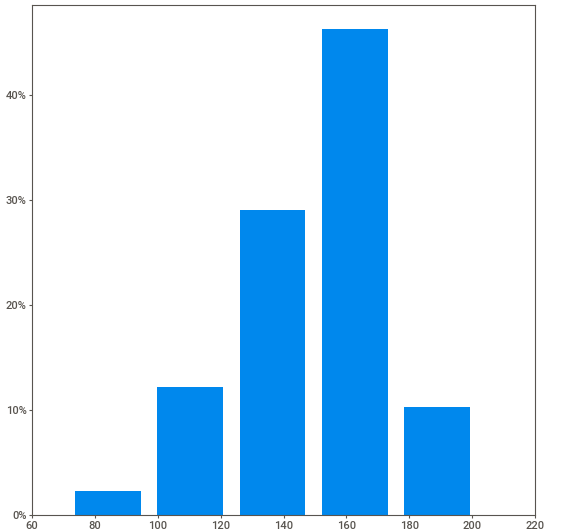
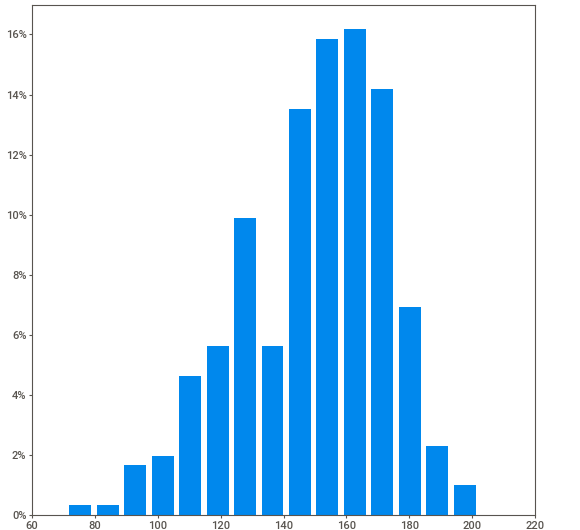
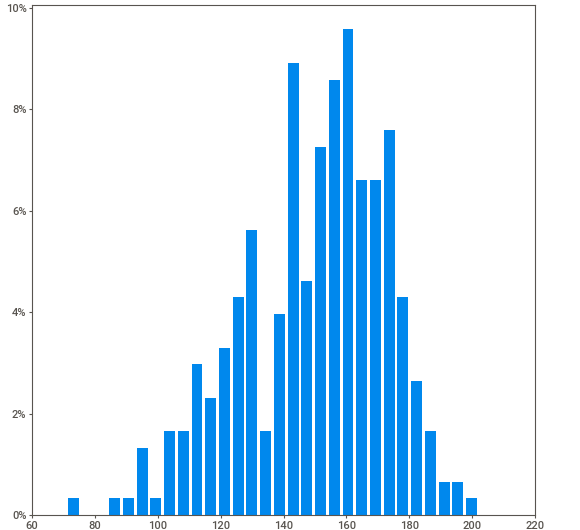
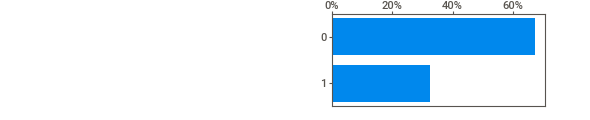
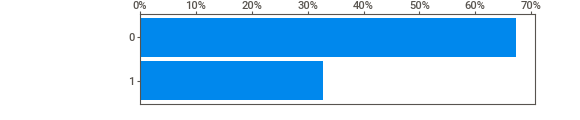
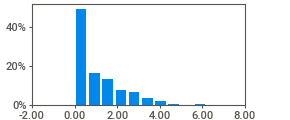
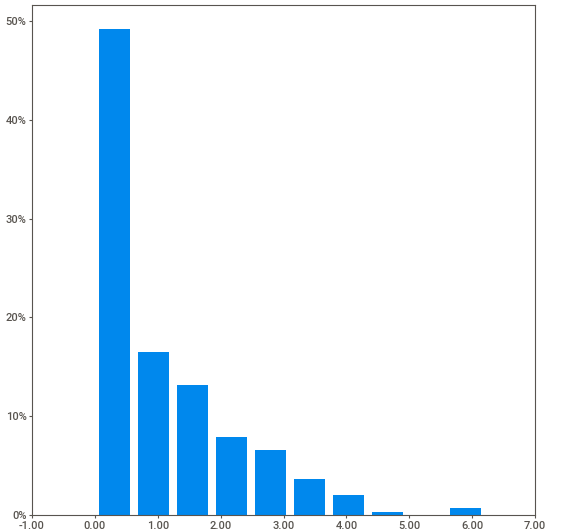
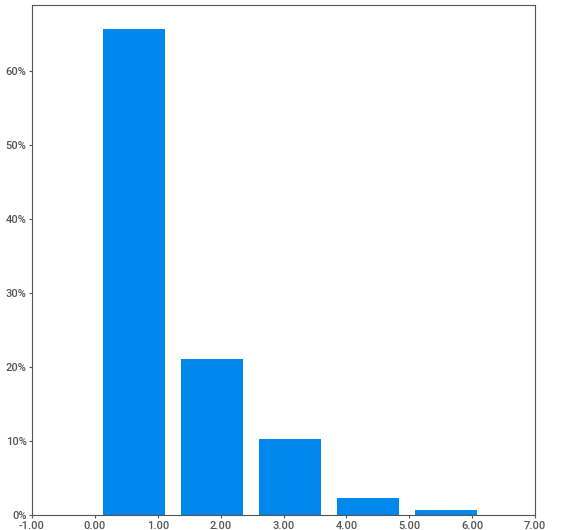
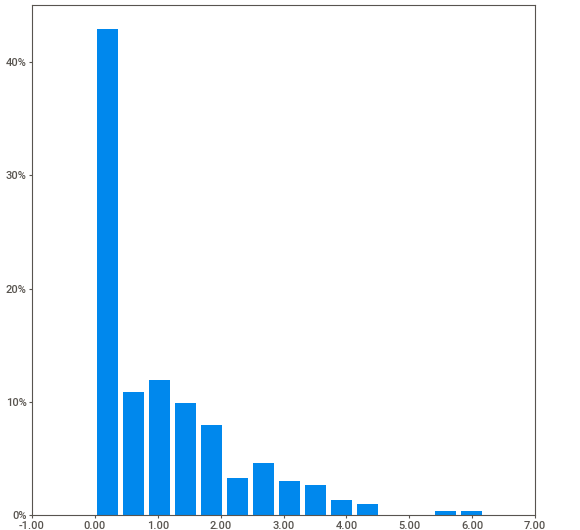
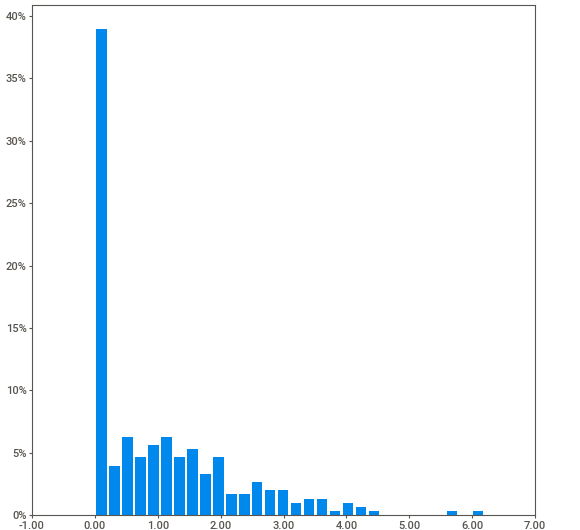
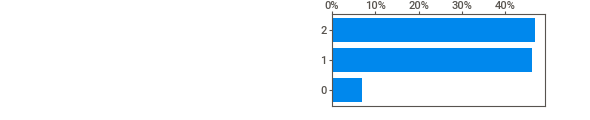
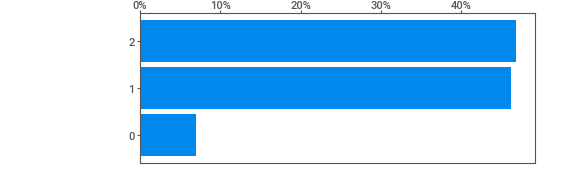
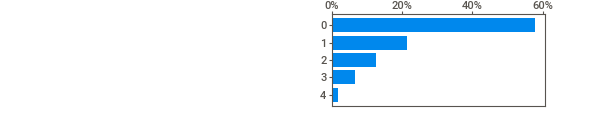
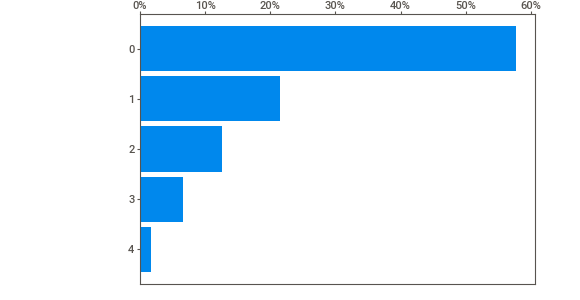
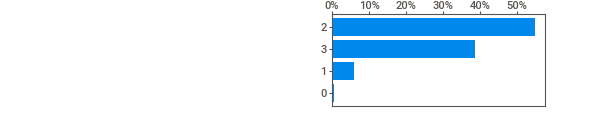
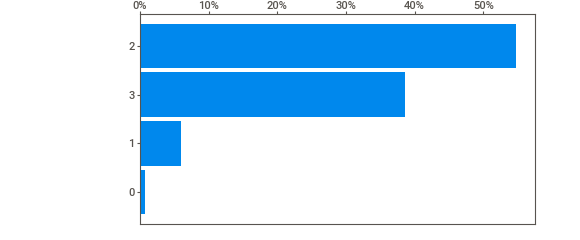
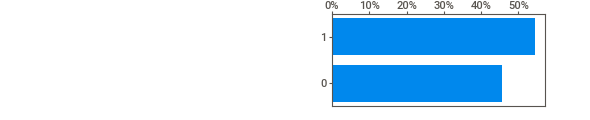
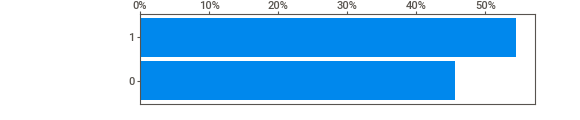
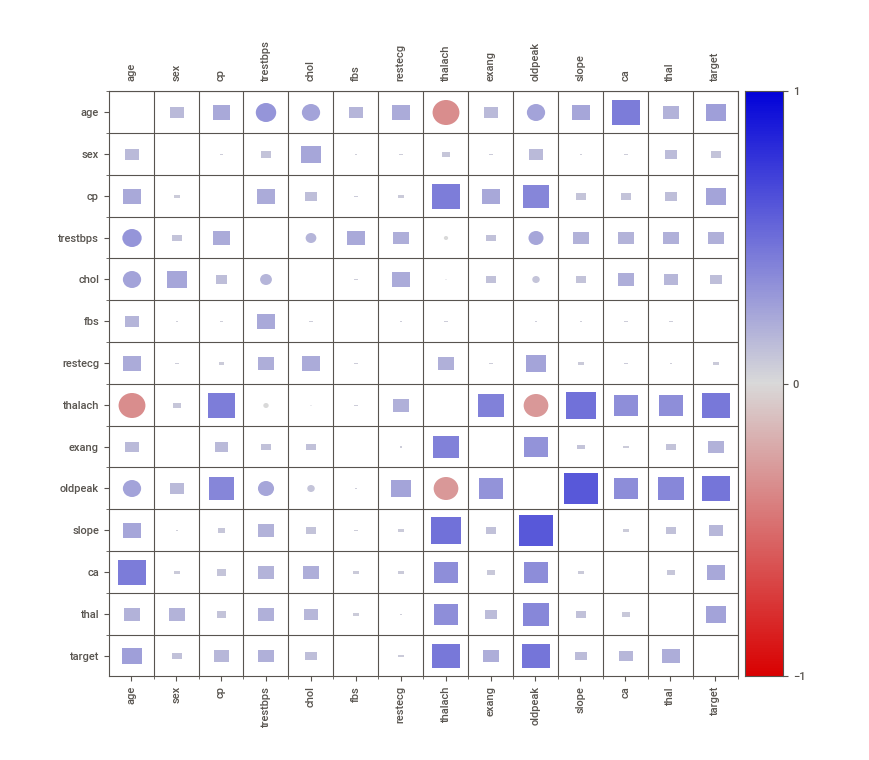
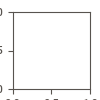

In [9]:
import sweetviz
sweetviz.analyze(data).show_notebook()

In [12]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
x = data
x = x.drop(columns=['target'], axis=1)

In [15]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y = data['target']

In [17]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
# train/test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=423)


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

clf_dt = DecisionTreeRegressor()
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)
print('DecisionTreeRegressor')
print(clf_dt.score(X_train, y_train))

DecisionTreeRegressor
1.0


In [35]:
mse = np.sqrt(mean_squared_error(pred_dt, y_test))
print('DecisionTreeRegressor')
print('평균제곱근오차', mse)

DecisionTreeRegressor
평균제곱근오차 0.5121475197315839


In [27]:
from sklearn.ensemble import RandomForestRegressor

rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)

pred_rf = rf_clf.predict(X_test)
print('RandomForest')
print(rf_clf.score(X_train, y_train))

RandomForest
0.9289423519736841


In [28]:
mse = np.sqrt(mean_squared_error(pred_rf, y_test))
print('RandomForest')
print('평균제곱근오차', mse)

RandomForest
평균제곱근오차 0.42158755386487684


In [29]:
from sklearn.linear_model import LinearRegression

clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)
print('LinearRegression')
print(clf_lr.score(X_train, y_train))

LinearRegression
0.5412687258059483


In [30]:
mse = np.sqrt(mean_squared_error(pred_lr, y_test))
print('LinearRegression')
print('평균제곱근오차', mse)

LinearRegression
평균제곱근오차 0.38817877542746987


In [32]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)
print('Support Vector Regression')
print(clf_svm.score(X_train, y_train))

Support Vector Regression
0.17865361156749449


In [33]:
mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('Support Vector Regression')
print('평균제곱근오차', mse)

Support Vector Regression
평균제곱근오차 0.4318653026881483
